# Imports

In [13]:
!pip install qiskit[visualization] qiskit-aer pylatexenc

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import circuit_drawer
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=fb817df3cd98d94cdf06a6bd14b1962e10373f67630ebcf35aaaede4b3a4b492
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


# LOOKING AT IT FROM THE X BASIS.
Step by step transforming between X and Z.

In [17]:
# @title BV in the X basis (step 1 CIRCUIT)

def create_bv_x1_circuit(secret_string):
    """
    Creates a simple classical 'WRITE-SECRET' circuit using CX gates and the X ancilla prep.
    """
    n = len(secret_string)
    # n data qubits + 1 ancilla (the last qubit)
    qc = QuantumCircuit(n + 1, n)

    # --- 0. PREPARE ANCILLA ---
    ancilla_index = n
    qc.barrier()

    # --- 1. INITIALIZATION ---
    # '1' on ancilla means: WRITE THE SECRET
    qc.x(ancilla_index)
    qc.barrier()

    # --- 2. THE 'ORACLE' (CX GATES) ---
    # We iterate through the secret string.
    # If the ancilla qubit is '1', we write the string into the measured qubits
    s_rev = secret_string[::-1]

    for qubit_index, bit in enumerate(s_rev):
      if bit == '1':
        qc.cx(ancilla_index, qubit_index)

    qc.barrier()

    # --- 4. MEASUREMENT ---
    # Verify the bits are written as requested
    qc.measure(range(n), range(n))

    return qc

In [19]:
# @title BV in the X basis (step 1 GRAPH & MEASUREMENTS)
# --- CONFIGURATION ---
secret_string = "10110011"
circuit = create_bv_x1_circuit(secret_string)

# --- VISUALIZATION ---
fig = circuit.draw('mpl', style='iqp', scale=1.3, filename='bv_x_circuit__2.png')

# Display the diagram
print(f"Generating Circuit for Secret String: {secret_string}")
display(fig)

# --- SIMULATION PROOF ---
simulator = AerSimulator()
compiled_circuit_x = transpile(circuit, simulator)
result_x = simulator.run(compiled_circuit_x, shots=1024).result()
counts_x = result_x.get_counts()

print("\n--- SIMULATION RESULTS ---")
print(f"Secret String: {secret_string}")
print(f"Measurement:   {counts_x}")
print("Did it work?   ", "YES" if list(counts_x.keys())[0] == secret_string else "NO")

Generating Circuit for Secret String: 10110011



--- SIMULATION RESULTS ---
Secret String: 10110011
Measurement:   {'10110011': 1024}
Did it work?    YES


In [15]:
# @title BV in the X basis (step 2c CIRCUIT)

def create_bv_x2c_circuit(secret_string):
    """
    Creates a Bernstein-Vazirani circuit using H CZ H gates and the X ancilla prep.
    """
    # n data qubits + 1 ancilla (the last qubit)
    n = len(secret_string)
    qc = QuantumCircuit(n + 1, n)

    # Note: We reverse the string to match Qiskit's qubit ordering (q0 is rightmost)
    s_rev = secret_string[::-1]

    # --- 0. PREPARE ANCILLA ---
    ancilla_index = n
    qc.barrier()

    # --- 1. INITIALIZATION ---
    qc.x(ancilla_index)
    qc.barrier()

    # We fill the missing Hadamard gates
    qc.h(range(n))
    qc.barrier()

    # --- 2. THE ORACLE (CZ GATES) ---
    # We iterate through the secret string.
    # If the bit is '1', we perform a CZ between that data qubit and the ancilla.
    #
    # The CZ transforms |+> and |-> states
    # and Hadamard rotates the X-basis states into the Z-basis output
    for qubit_index, bit in enumerate(s_rev):
        if bit == '1':
            qc.cz(ancilla_index, qubit_index)
    qc.barrier()

    # We fill the missing Hadamard gates
    qc.h(range(n))
    qc.barrier()

    # --- 4. MEASUREMENT ---
    # Measure data qubits into classical bits
    qc.measure(range(n), range(n))

    return qc

Generating Circuit for Secret String: 10110011


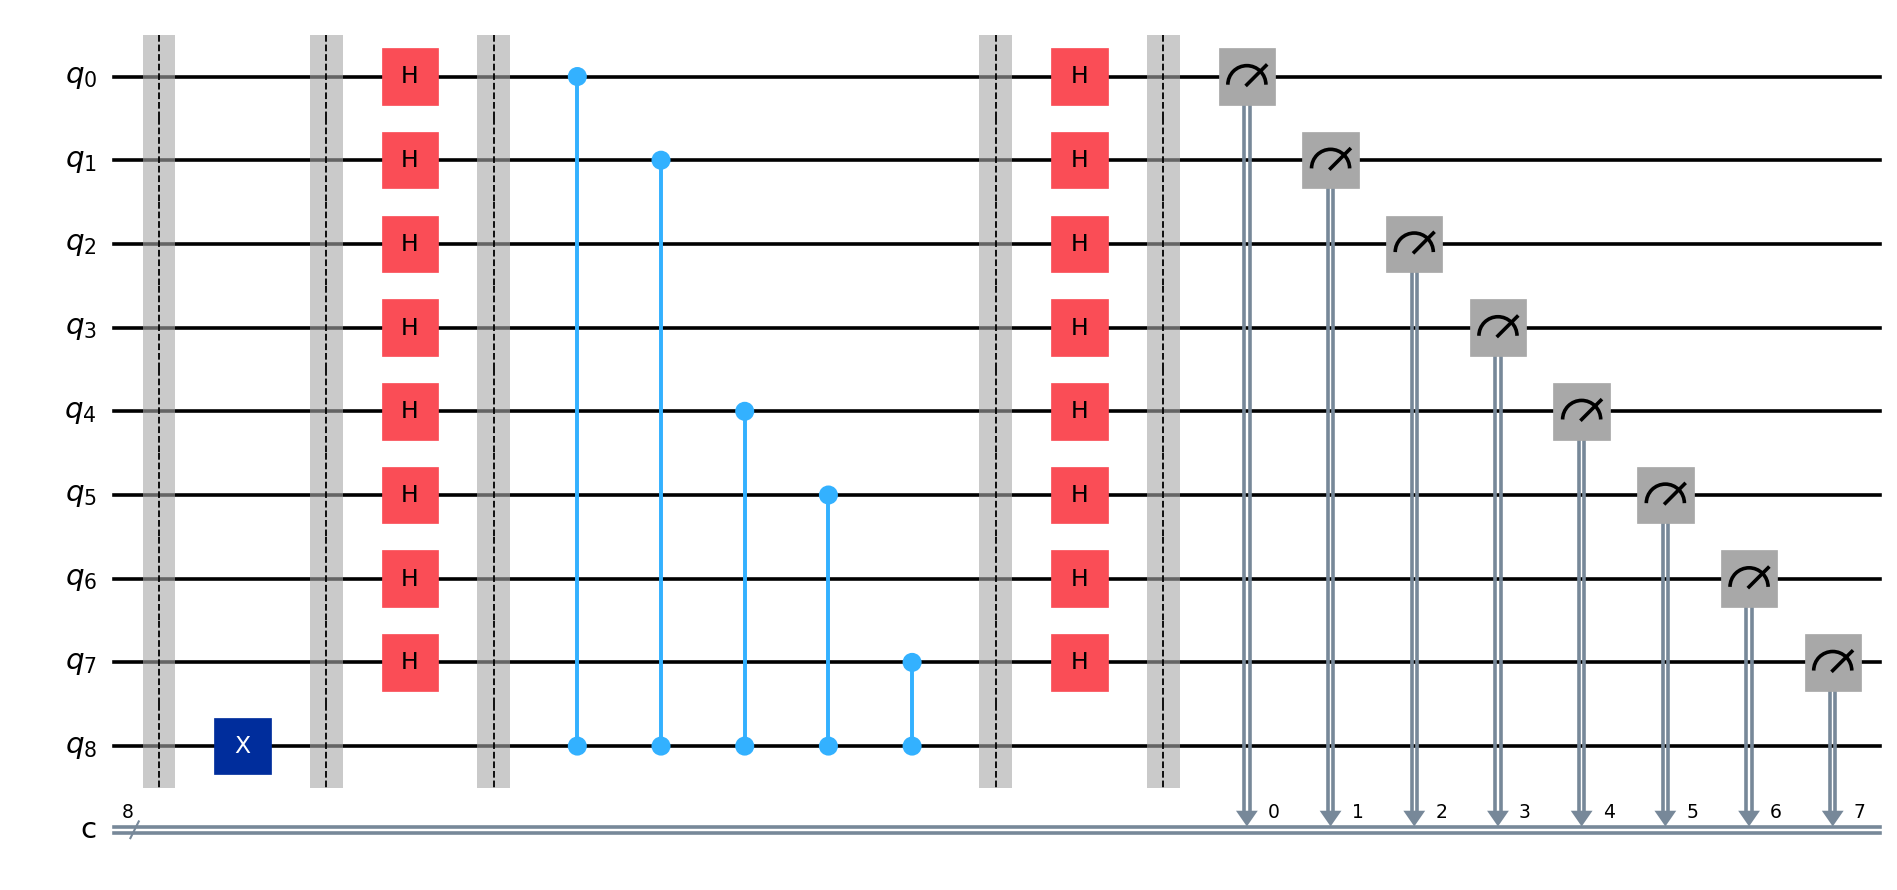


--- SIMULATION RESULTS ---
Secret String: 10110011
Measurement:   {'10110011': 1024}
Did it work?    YES


In [21]:
# @title BV in the X basis (step 2c GRAPH & MEASUREMENTS)

# --- CONFIGURATION ---
secret_string = "10110011"
circuit = create_bv_x2c_circuit(secret_string)

# --- VISUALIZATION FOR LINKEDIN ---
fig = circuit.draw('mpl', style='iqp', scale=1.3, filename='bv_x_circuit__2c.png')

# Display the diagram
print(f"Generating Circuit for Secret String: {secret_string}")
display(fig)

# --- SIMULATION PROOF ---
simulator = AerSimulator()
compiled_circuit_x_2c = transpile(circuit, simulator)
result_x_2c = simulator.run(compiled_circuit_x_2c, shots=1024).result()
counts_x_2c = result_x_2c.get_counts()

print("\n--- SIMULATION RESULTS ---")
print(f"Secret String: {secret_string}")
print(f"Measurement:   {counts_x}")
print("Did it work?   ", "YES" if list(counts_x.keys())[0] == secret_string else "NO")

In [16]:
# @title BV in the X basis (FINAL CIRCUIT)

def create_bv_x_final_circuit(secret_string):
    """
    Creates a 'regular' Bernstein-Vazirani circuit using CX gates and the X ancilla prep.
    """
    n = len(secret_string)
    # n data qubits + 1 ancilla (the last qubit)
    qc = QuantumCircuit(n + 1, n)

    # --- 0. PREPARE ANCILLA ---
    ancilla_index = n
    qc.barrier()

    # --- 1. INITIALIZATION ---
    # Prepare ancilla qubit
    qc.x(ancilla_index)
    qc.barrier()

    # Apply H to all data qubits
    qc.h(range(n+1))
    qc.barrier()

    # --- 2. THE ORACLE (CX GATES) ---
    # We iterate through the secret string.
    # If the ancilla qubit is '1', the CX kicks the phase back to measured qubits
    # and Hadamard rotates the phase into the Z-basis output
    s_rev = secret_string[::-1]

    for qubit_index, bit in enumerate(s_rev):
        if bit == '1':
            qc.cx(qubit_index, ancilla_index)
    qc.barrier()

    # --- 3. MEASUREMENT BASIS CHANGE ---
    # Apply H to data qubits to switch back from X-basis to Z-basis
    qc.h(range(n+1))
    qc.barrier()

    # --- 4. MEASUREMENT ---
    # Measure data qubits into classical bits
    qc.measure(range(n), range(n))

    return qc

Generating Circuit for Secret String: 10110011


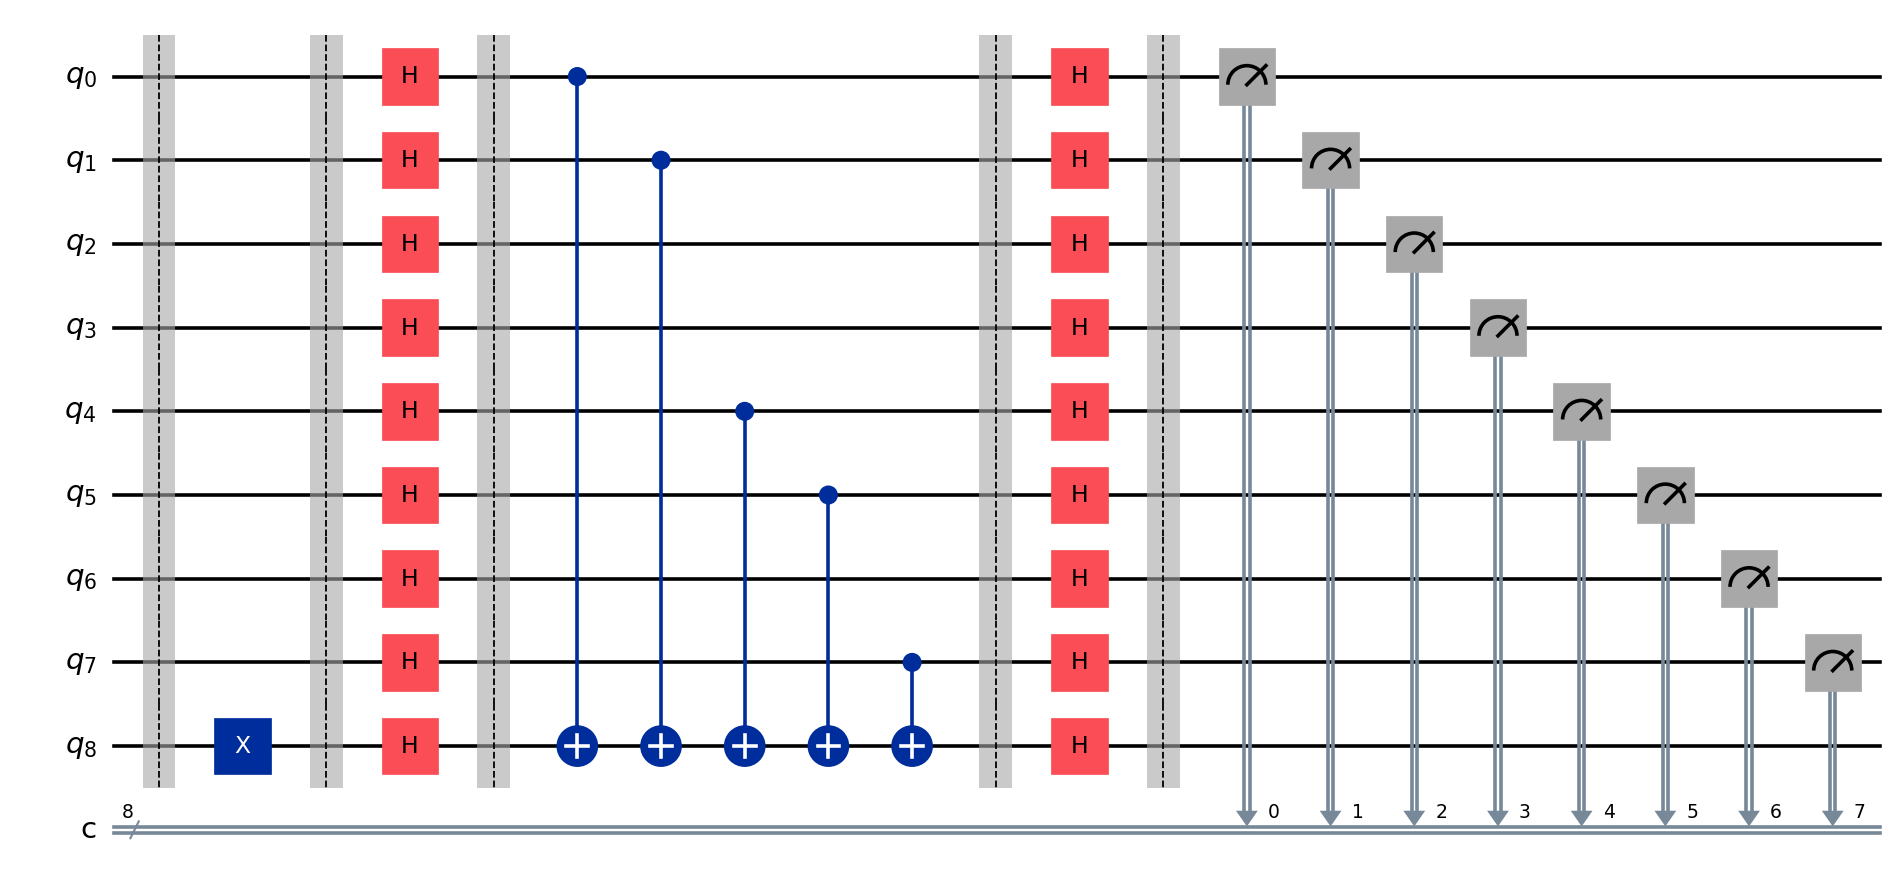


--- SIMULATION RESULTS ---
Secret String: 10110011
Measurement:   {'10110011': 1024}
Did it work?    YES


In [22]:
# @title BV in the X basis (FINAL GRAPH & MEASUREMENTS)
# --- CONFIGURATION ---
secret_string = "10110011"
circuit = create_bv_x_final_circuit(secret_string)

# --- VISUALIZATION ---
fig = circuit.draw('mpl', style='iqp', scale=1.3, filename='bv_x_circuit__1.png')

# Display the diagram
print(f"Generating Circuit for Secret String: {secret_string}")
display(fig)

# --- SIMULATION PROOF ---
simulator = AerSimulator()
compiled_circuit_x_final = transpile(circuit, simulator)
result_x_final = simulator.run(compiled_circuit_x_final, shots=1024).result()
counts_x_final = result_x_final.get_counts()

print("\n--- SIMULATION RESULTS ---")
print(f"Secret String: {secret_string}")
print(f"Measurement:   {counts_x}")
print("Did it work?   ", "YES" if list(counts_x.keys())[0] == secret_string else "NO")